# Convolution
---


Self convolution term

$F(\omega)$ represents the self-convolution of the fundamental field's spectrum, $A_{\omega}(\omega)$:

$$
F(\omega) = \frac{1}{2\pi}\int_{\mathbb{R}} A_\omega(\omega') A_\omega(\omega - \omega') \, d\omega'
$$

For SHG, two fundamental photons combine to form one second harminic photon. In the frequency domain, this means that if you have two fundamental photons with frequencies $\omega'$ and $(\omega - \omega')$, their sum frequency will be $\omega$. The integral sums up all possible pairs of fundamental frequencies that add up to a specific second harmonic frequency $\omega$.

$F(\omega)$ acts as the __"forcing term"__  or __"source term"__ for the generation of the second harmonic. It dictates the spectral distribution of the power available from the fundamental pulse to create the second harmonic.

The shape of $F(\omega)$ is directly determined by the spectral shape of your fundamental pulse $A_{\omega}(\omega)$. For instance, if $A_{\omega}(\omega)$ is a Gaussian spectrum centered at $\omega_0$​ with a certain bandwidth, then $F(\omega)$ will also be a Gaussian spectrum centered at $2\omega_0$​, but with a broader bandwidth (specifically, 2​ times the bandwidth in frequency if the input is a single Gaussian pulse). The peak of $F(\omega)$ will be at $2\omega_0$​, indicating the highest potential for second harmonic generation at this frequency.




In [1]:
# import libraries

import  numpy as np
import matplotlib.pyplot as plt

# plt.style.use('dark_background')

In [2]:
# Definir la función gaussiana
def gaussian(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu)**2) / (2 * sigma**2))
    #  return np.exp(-((x - mu)**2) / (2 * sigma**2))

def conv_discrete(f, g, x):
    dx = x[1] - x[0]  # Paso de muestreo
    return np.convolve(f, g, mode='same') * dx  # Escalar por dt para aproximar la integral

def conv_theoretical(t, mu1, sigma1, mu2, sigma2):
    # Media = mu1 + mu2, Varianza = sigma1^2 + sigma2^2
    mu_conv = mu1 + mu2
    sigma_conv = np.sqrt(sigma1**2 + sigma2**2)
    conv_theoretical_ = gaussian(t, mu_conv, sigma_conv)
    
    return conv_theoretical_

In [3]:
scale_ = 1e15  # Escala para normalizar valores grandes

# Input gaussian | initial parmeters
central_f = 2.37e+15 
sigma_f = 5.57e+13 

f_range = 8 * sigma_f
frequencies = np.linspace(central_f - f_range, central_f + f_range, 2000)  # frequency's domain

# Compute initial gaussian
a_input= gaussian(frequencies, central_f, sigma_f)

# Discrete convolution
conv_result = conv_discrete(a_input, a_input, frequencies)  # self-convolution
conv_frequencies = frequencies * 2  # la convolulcion dobla la frecuencia central

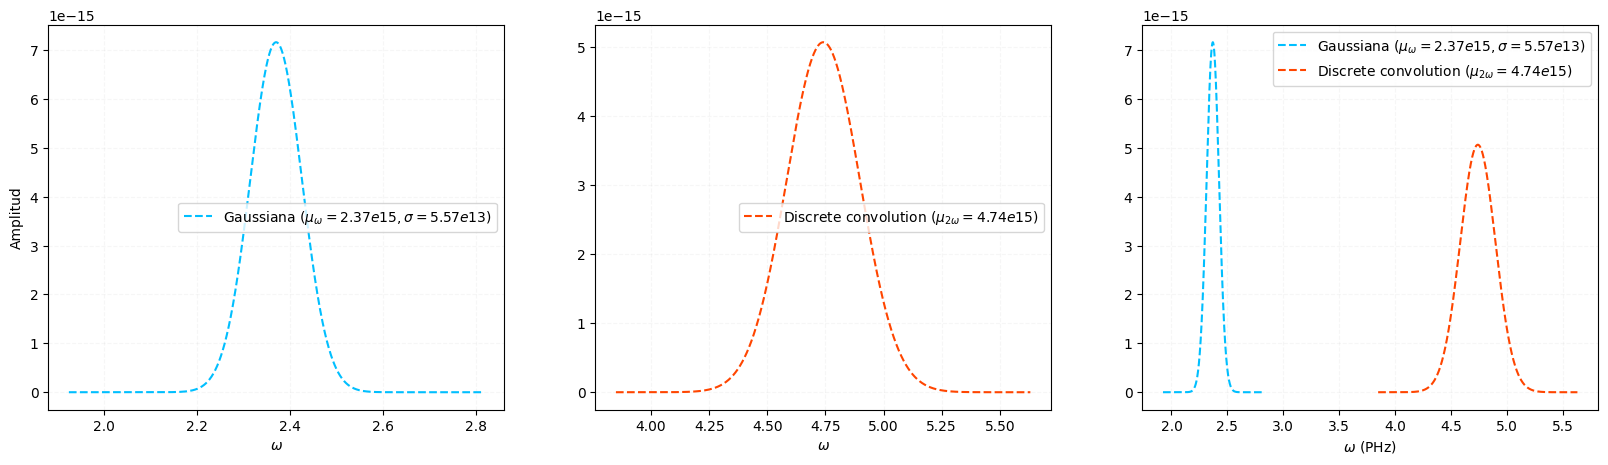

In [5]:
# --- Visualización Comparativa entrada y salida---
fig1, axs = plt.subplots(1,3,figsize=(20,5))

axs[0].plot(frequencies*1e-15, a_input, label=r'Gaussiana ($\mu_{\omega}=2.37e15, \sigma=5.57e13$)', linestyle='--', color='deepskyblue')
axs[0].set_xlabel(r'$\omega$')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.1)
axs[1].plot(conv_frequencies*1e-15, conv_result, label=r'Discrete convolution ($\mu_{2\omega}=4.74e15$)', linestyle='--', color='orangered')
axs[1].set_xlabel(r'$\omega$')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.1)
axs[2].plot(frequencies*1e-15, a_input, label=r'Gaussiana ($\mu_{\omega}=2.37e15, \sigma=5.57e13$)', linestyle='--', color='deepskyblue')
axs[2].plot(conv_frequencies*1e-15, conv_result, label=r'Discrete convolution ($\mu_{2\omega}=4.74e15$)', linestyle='--', color='orangered')
axs[2].set_xlabel(r'$\omega$ (PHz)')

axs[2].legend()
axs[2].grid(True, linestyle='--', alpha=0.1)